# Housing Resale Price Drivers

## Dataset Preparation

In [11]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib. pyplot as plt
import seaborn as sns
import requests
from sklearn.model_selection import TimeSeriesSplit

% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
# df1 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
# df2 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
# df3 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
# df1['month']=pd.to_datetime(df1.month)
# df2['month']=pd.to_datetime(df2.month)
# df3['month']=pd.to_datetime(df3.month)
# df1['remaining_lease'] = 99 - (df1.month.dt.year - df1.lease_commence_date)
# df3['remaining_lease'] = df3.apply(lambda x: int(x.remaining_lease.split(' ')[0]), axis=1)
# df = pd.concat([df1,df2,df3])
# df['year']=df.month.dt.year
# df['approx_storey'] = df.apply(lambda x: (int(x.storey_range.split(' ')[-1]) + int(x.storey_range.split(' ')[0]))/2, axis=1)
# df=df.loc[df.year!=2020]
# df['address'] = df.apply(lambda x: x.block + ' ' + x.street_name, axis=1)
# df.to_csv('all.csv')

In [12]:
df = pd.read_csv('all.csv', index_col=0)
type_cat=CategoricalDtype(["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE", "MULTI-GENERATION"], ordered=True)
df['flat_type']=df.flat_type.astype(type_cat)


In [34]:
df.sample(5)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,year,approx_storey,address
17992,126C,Improved,5 ROOM,110.0,2003,2017-11-01,84,393000.0,13 TO 15,EDGEDALE PLAINS,PUNGGOL,2017,14.0,126C EDGEDALE PLAINS
57934,503A,Apartment,EXECUTIVE,130.0,2001,2019-09-01,80,485000.0,01 TO 03,CANBERRA LINK,SEMBAWANG,2019,2.0,503A CANBERRA LINK
22919,45,Improved,2 ROOM,45.0,1976,2018-03-01,56,240000.0,04 TO 06,TELOK BLANGAH DR,BUKIT MERAH,2018,5.0,45 TELOK BLANGAH DR
37983,173,Improved,3 ROOM,66.0,1972,2014-02-01,57,345000.0,07 TO 09,LOR 1 TOA PAYOH,TOA PAYOH,2014,8.0,173 LOR 1 TOA PAYOH
49543,614,Simplified,4 ROOM,84.0,1986,2019-05-01,65,316000.0,01 TO 03,HOUGANG AVE 8,HOUGANG,2019,2.0,614 HOUGANG AVE 8


In [5]:
df.describe()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,year,approx_storey
count,153934.000000,153934.000000,153934.000000,1.539340e+05,153934.000000,153934.000000
mean,97.079070,1991.576240,74.563391,4.460591e+05,2015.691673,8.187587
std,24.502416,11.480274,11.380239,1.398681e+05,2.336447,5.392958
min,31.000000,1966.000000,46.000000,1.500000e+05,2012.000000,2.000000
25%,74.000000,1984.000000,66.000000,3.450000e+05,2014.000000,5.000000
50%,95.000000,1989.000000,74.000000,4.200000e+05,2016.000000,8.000000
75%,112.000000,2000.000000,84.000000,5.150000e+05,2018.000000,11.000000
max,280.000000,2016.000000,98.000000,1.205000e+06,2019.000000,50.000000


## Understanding the variables

In [6]:
df.town.value_counts()

JURONG WEST        12226
WOODLANDS          12157
SENGKANG           10775
TAMPINES           10629
YISHUN             10115
BEDOK               9311
HOUGANG             7559
ANG MO KIO          7314
PUNGGOL             7001
CHOA CHU KANG       6473
BUKIT BATOK         6094
BUKIT MERAH         6082
BUKIT PANJANG       5519
TOA PAYOH           5012
PASIR RIS           4798
KALLANG/WHAMPOA     4592
QUEENSTOWN          4153
GEYLANG             4106
SEMBAWANG           4001
CLEMENTI            3642
JURONG EAST         3516
SERANGOON           3309
BISHAN              2885
CENTRAL AREA        1272
MARINE PARADE       1017
BUKIT TIMAH          376
Name: town, dtype: int64

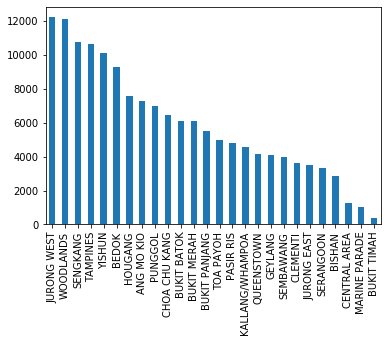

In [7]:
df.town.value_counts().plot(kind='bar')

In [8]:
df.flat_type.value_counts()

4 ROOM              62077
3 ROOM              40993
5 ROOM              36629
EXECUTIVE           12245
2 ROOM               1848
1 ROOM                 83
MULTI-GENERATION       59
Name: flat_type, dtype: int64

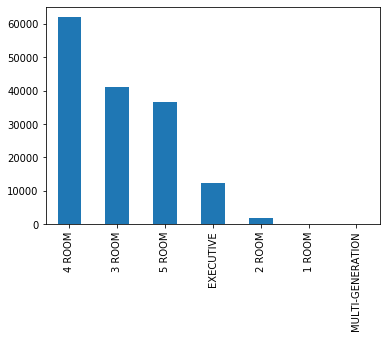

In [9]:
df.flat_type.value_counts().plot(kind='bar')

In [10]:
df.flat_model.value_counts()

Model A                   46417
Improved                  39449
New Generation            24992
Premium Apartment         15033
Simplified                 7726
Apartment                  6220
Standard                   5130
Maisonette                 4403
Model A2                   2257
DBSS                       1223
Model A-Maisonette          255
Type S1                     255
Adjoined flat               253
Type S2                     118
Terrace                      95
Multi Generation             59
Improved-Maisonette          23
Premium Maisonette           13
Premium Apartment Loft       12
2-room                        1
Name: flat_model, dtype: int64

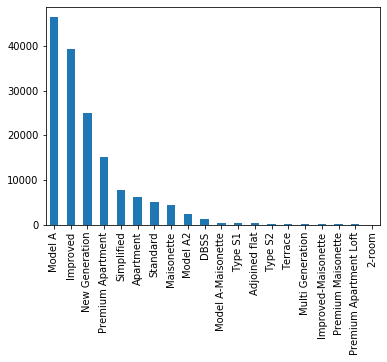

In [11]:
df.flat_model.value_counts().plot(kind='bar')

In [12]:
corr = df.corr()
corr
#things that seem to affect resale price: floor area

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,year,approx_storey
floor_area_sqm,1.000000,0.336553,0.336417,0.663565,0.020380,0.035023
lease_commence_date,0.336553,1.000000,0.974828,0.346694,0.158087,0.255462
remaining_lease,0.336417,0.974828,1.000000,0.367078,-0.062931,0.240572
resale_price,0.663565,0.346694,0.367078,1.000000,-0.074461,0.346861
year,0.020380,0.158087,-0.062931,-0.074461,1.000000,0.074252
approx_storey,0.035023,0.255462,0.240572,0.346861,0.074252,1.000000


In [13]:
df.sort_values(by='resale_price', ascending=False).head(5)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,year,approx_storey,address
53829,8,DBSS,5 ROOM,119.0,2011,2019-07-01,90,1205000.0,37 TO 39,BOON KENG RD,KALLANG/WHAMPOA,2019,38.0,8 BOON KENG RD
47273,9A,Improved,5 ROOM,112.0,2016,2019-04-01,95,1200000.0,34 TO 36,BOON TIONG RD,BUKIT MERAH,2019,35.0,9A BOON TIONG RD
55313,1C,Type S2,5 ROOM,106.0,2011,2019-08-01,90,1200000.0,40 TO 42,CANTONMENT RD,CENTRAL AREA,2019,41.0,1C CANTONMENT RD
51323,1C,Type S2,5 ROOM,106.0,2011,2019-06-01,90,1188000.0,40 TO 42,CANTONMENT RD,CENTRAL AREA,2019,41.0,1C CANTONMENT RD
43164,9,DBSS,5 ROOM,117.0,2011,2019-01-01,90,1185000.0,37 TO 39,BOON KENG RD,KALLANG/WHAMPOA,2019,38.0,9 BOON KENG RD


In [14]:
df.sort_values(by='resale_price', ascending=False).tail(5)

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,year,approx_storey,address
45507,7,Improved,1 ROOM,31.0,1975,2019-03-01,55,165000.0,07 TO 09,TELOK BLANGAH CRES,BUKIT MERAH,2019,8.0,7 TELOK BLANGAH CRES
57064,7,Improved,1 ROOM,31.0,1975,2019-09-01,54,165000.0,04 TO 06,TELOK BLANGAH CRES,BUKIT MERAH,2019,5.0,7 TELOK BLANGAH CRES
35254,39,Standard,2 ROOM,47.0,1971,2018-09-01,51,160000.0,04 TO 06,CIRCUIT RD,GEYLANG,2018,5.0,39 CIRCUIT RD
53403,71,Standard,2 ROOM,42.0,1969,2019-07-01,48,160000.0,04 TO 06,CIRCUIT RD,GEYLANG,2019,5.0,71 CIRCUIT RD
59273,68,Standard,2 ROOM,45.0,1969,2019-10-01,48,150000.0,04 TO 06,CIRCUIT RD,GEYLANG,2019,5.0,68 CIRCUIT RD


## Understanding the Resale Price in relation to other features

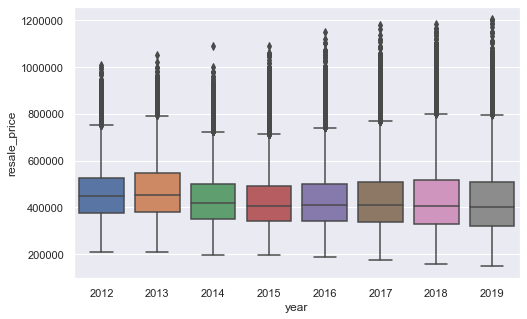

In [15]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(y='resale_price', x='year', data=df)
#Prices look relatively stable across years

[Text(0, 0, 'ANG MO KIO'),
 Text(0, 0, 'BEDOK'),
 Text(0, 0, 'BISHAN'),
 Text(0, 0, 'BUKIT BATOK'),
 Text(0, 0, 'BUKIT MERAH'),
 Text(0, 0, 'BUKIT PANJANG'),
 Text(0, 0, 'BUKIT TIMAH'),
 Text(0, 0, 'CENTRAL AREA'),
 Text(0, 0, 'CHOA CHU KANG'),
 Text(0, 0, 'CLEMENTI'),
 Text(0, 0, 'GEYLANG'),
 Text(0, 0, 'HOUGANG'),
 Text(0, 0, 'JURONG EAST'),
 Text(0, 0, 'JURONG WEST'),
 Text(0, 0, 'KALLANG/WHAMPOA'),
 Text(0, 0, 'MARINE PARADE'),
 Text(0, 0, 'PASIR RIS'),
 Text(0, 0, 'PUNGGOL'),
 Text(0, 0, 'QUEENSTOWN'),
 Text(0, 0, 'SEMBAWANG'),
 Text(0, 0, 'SENGKANG'),
 Text(0, 0, 'SERANGOON'),
 Text(0, 0, 'TAMPINES'),
 Text(0, 0, 'TOA PAYOH'),
 Text(0, 0, 'WOODLANDS'),
 Text(0, 0, 'YISHUN')]

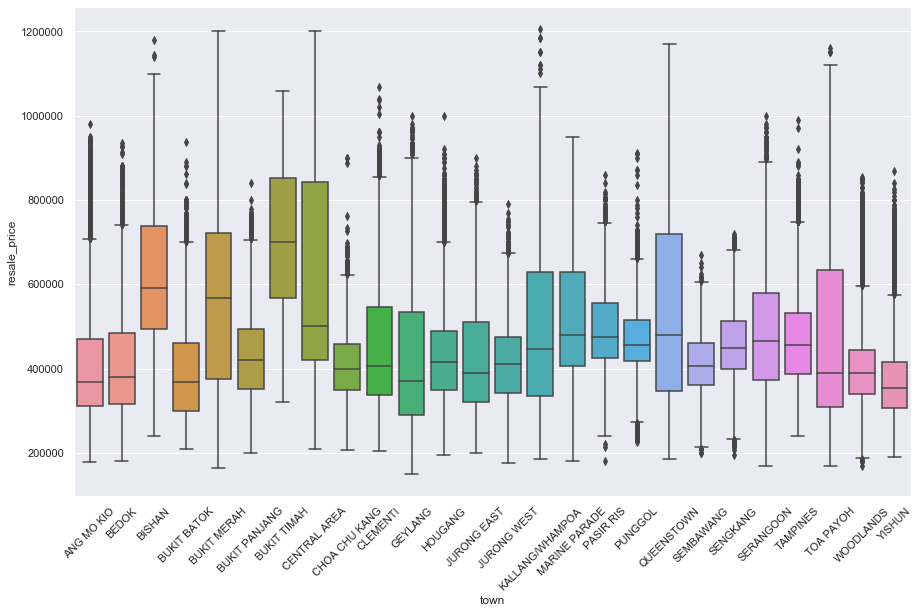

In [16]:
sns.set(rc={'figure.figsize':(15,9)})
chart_town = sns.boxplot(y='resale_price', x='town', data=df)
x_town=chart_town.get_xticklabels()
chart_town.set_xticklabels(x_town, rotation=45)
#Location / Town appears to affect Resale Price Across Singapore
#Huge variations within: Bishan, Bukit Batok, Bukit Panjang, Bukit Timah, Geylang, Jurong, Queenstown, Toa Payoh
#-- other underlying factors at play here to see how Resale Price affect a Town

[Text(0, 0, 'Improved'),
 Text(0, 0, 'New Generation'),
 Text(0, 0, 'Standard'),
 Text(0, 0, 'Model A'),
 Text(0, 0, 'Simplified'),
 Text(0, 0, 'Premium Apartment'),
 Text(0, 0, 'Maisonette'),
 Text(0, 0, 'Model A-Maisonette'),
 Text(0, 0, 'Apartment'),
 Text(0, 0, 'Adjoined flat'),
 Text(0, 0, 'Multi Generation'),
 Text(0, 0, 'Model A2'),
 Text(0, 0, 'Terrace'),
 Text(0, 0, 'Improved-Maisonette'),
 Text(0, 0, 'Premium Maisonette'),
 Text(0, 0, 'DBSS'),
 Text(0, 0, 'Type S1'),
 Text(0, 0, 'Type S2'),
 Text(0, 0, 'Premium Apartment Loft'),
 Text(0, 0, '2-room')]

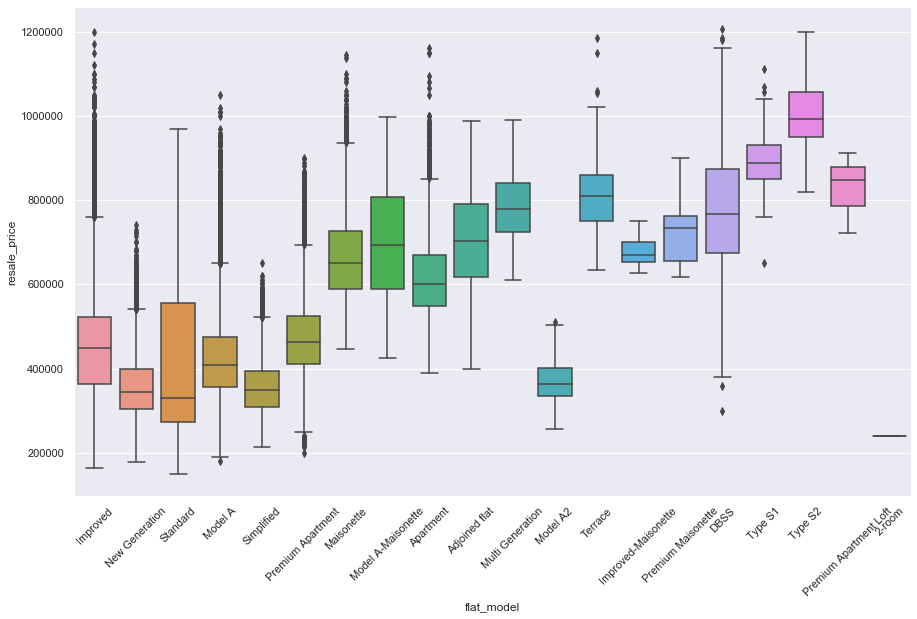

In [17]:
chart_model=sns.boxplot(y='resale_price', x='flat_model', data=df)
x_model=chart_model.get_xticklabels()
chart_model.set_xticklabels(x_model, rotation=45)

# more expensive (eg. mean > 800k): Terrace, Type S1, Type S2, Premium Apartment Loft
#DBSS & Multigen also notably higher

[Text(0, 0, '1 ROOM'),
 Text(0, 0, '2 ROOM'),
 Text(0, 0, '3 ROOM'),
 Text(0, 0, '4 ROOM'),
 Text(0, 0, '5 ROOM'),
 Text(0, 0, 'EXECUTIVE'),
 Text(0, 0, 'MULTI-GENERATION')]

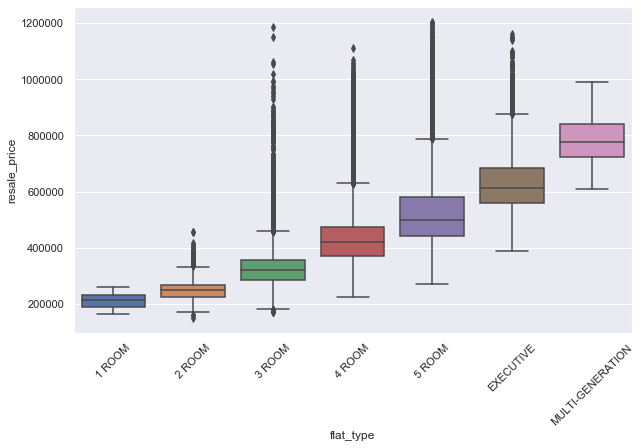

In [18]:
sns.set(rc={'figure.figsize':(10,6)})
chart_type=sns.boxplot(y='resale_price', x='flat_type', data=df)
x_type=chart_type.get_xticklabels()
chart_type.set_xticklabels(x_type, rotation=45)


#this is logical, with more rooms, there would be more sq area & the price would increase
#however, need to check about multigenerational - are they always highly priced for its nature or due to sq area?

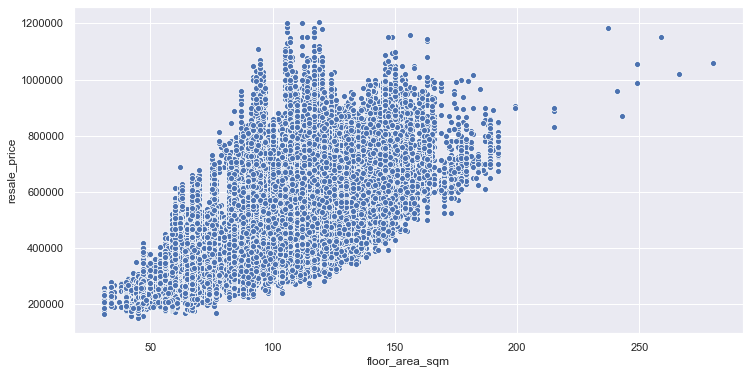

In [19]:
sns.set(rc={'figure.figsize':(12,6)})
sns.scatterplot(x="floor_area_sqm", y="resale_price", data=df)

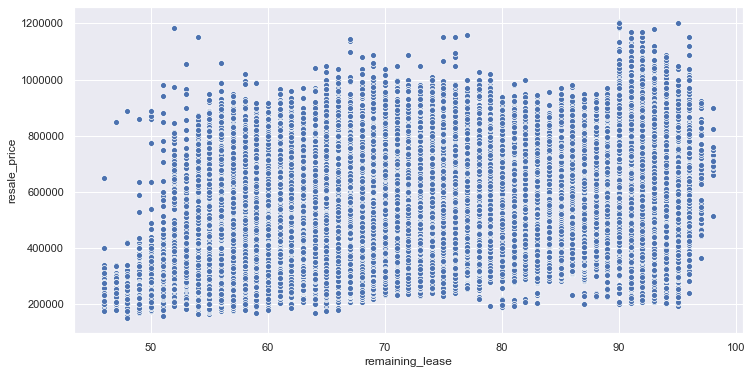

In [20]:
sns.scatterplot(x="remaining_lease", y="resale_price", data=df)

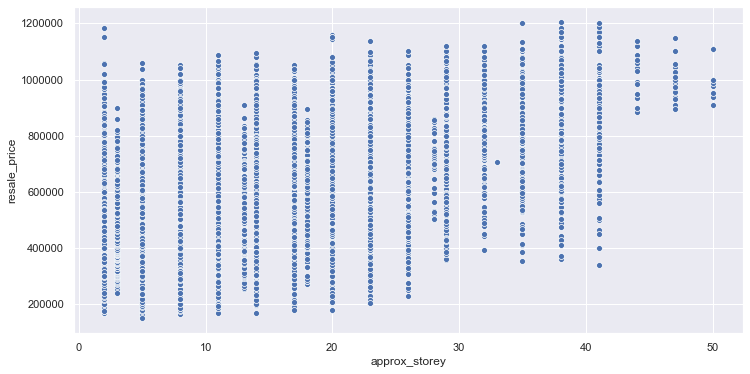

In [21]:
sns.scatterplot(x="approx_storey", y="resale_price", data=df)
#minimum price of flat goes up as the storey increases (40+ storey may have other factors 
#-- eg are there certain towns with exceptionally high houses?)

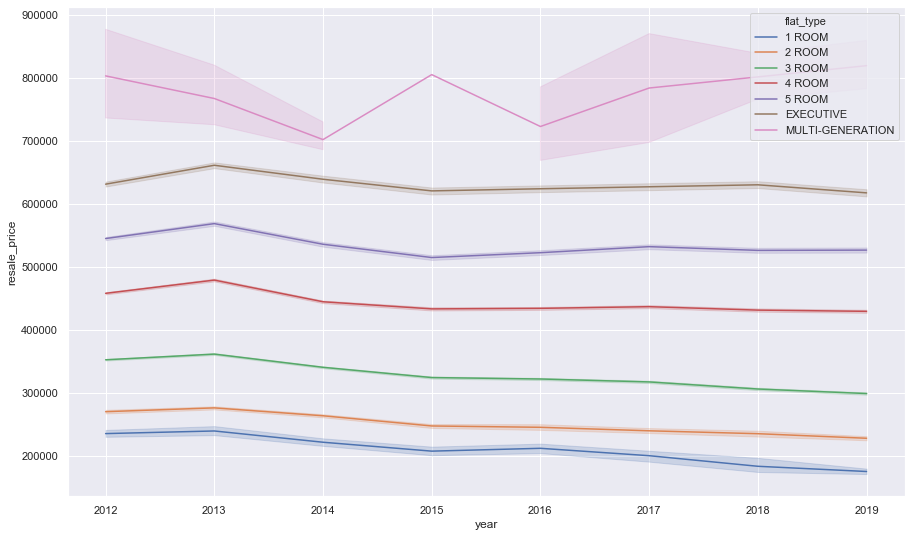

In [22]:
sns.set(rc={'figure.figsize':(15,9)})
sns.lineplot(x="year", y="resale_price", hue="flat_type", data=df);
#all rose in 2013, and gradually decreased till 2015, except multi gen
#By default, the plot aggregates over multiple y values at each value of x and 
#shows an estimate of the central tendency and a confidence interval for that estimate.



C:\Users\Sheryl Ker\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


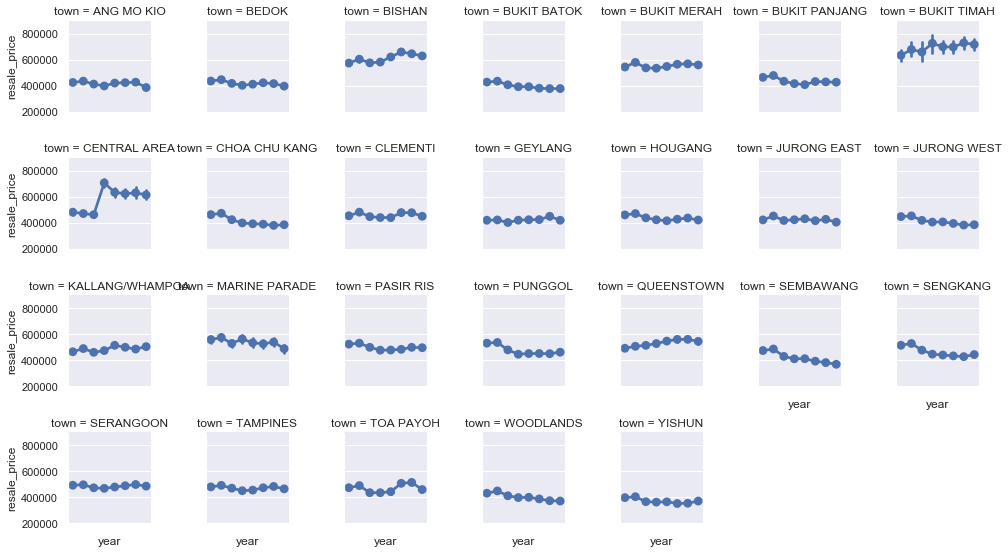

In [23]:
g = sns.FacetGrid(df, col="town", col_wrap=7, height=2, ylim=(200000, 900000))
g.map(sns.pointplot, "year", "resale_price");
g.set(xticklabels=[])
#plot this separately as there are too many categories, plotting in one plot would be hard to differentiate

## Are the price influence of flatmodel & location due to floor area or something else?


[Text(0, 0, 'ANG MO KIO'),
 Text(0, 0, 'BEDOK'),
 Text(0, 0, 'BISHAN'),
 Text(0, 0, 'BUKIT BATOK'),
 Text(0, 0, 'BUKIT MERAH'),
 Text(0, 0, 'BUKIT PANJANG'),
 Text(0, 0, 'BUKIT TIMAH'),
 Text(0, 0, 'CENTRAL AREA'),
 Text(0, 0, 'CHOA CHU KANG'),
 Text(0, 0, 'CLEMENTI'),
 Text(0, 0, 'GEYLANG'),
 Text(0, 0, 'HOUGANG'),
 Text(0, 0, 'JURONG EAST'),
 Text(0, 0, 'JURONG WEST'),
 Text(0, 0, 'KALLANG/WHAMPOA'),
 Text(0, 0, 'MARINE PARADE'),
 Text(0, 0, 'PASIR RIS'),
 Text(0, 0, 'PUNGGOL'),
 Text(0, 0, 'QUEENSTOWN'),
 Text(0, 0, 'SEMBAWANG'),
 Text(0, 0, 'SENGKANG'),
 Text(0, 0, 'SERANGOON'),
 Text(0, 0, 'TAMPINES'),
 Text(0, 0, 'TOA PAYOH'),
 Text(0, 0, 'WOODLANDS'),
 Text(0, 0, 'YISHUN')]

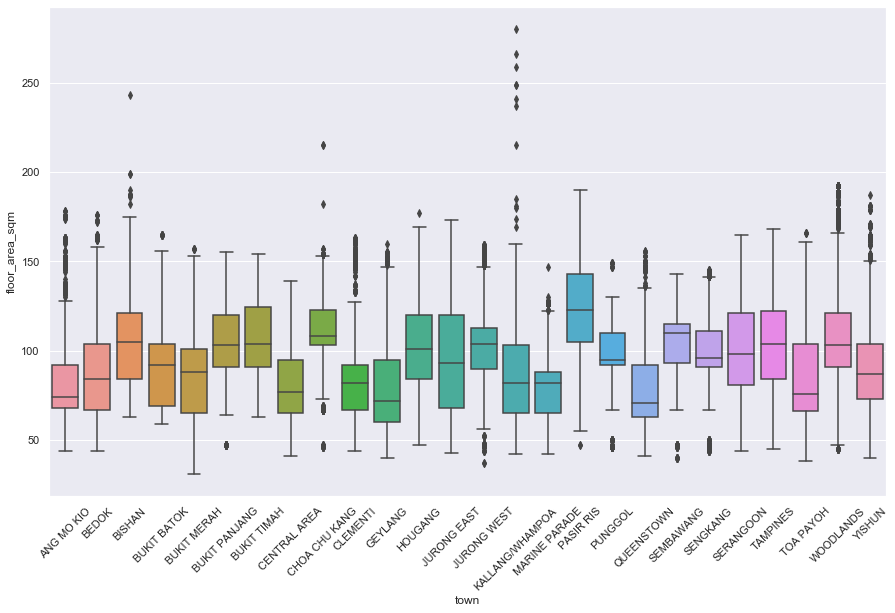

In [24]:
sns.set(rc={'figure.figsize':(15,9)})
chart_town = sns.boxplot(y='floor_area_sqm', x='town', data=df)
x_town=chart_town.get_xticklabels()
chart_town.set_xticklabels(x_town, rotation=45)
#Location / Town appears to affect Resale Price Across Singapore
#Huge variations within: Bishan, Bukit Batok, Bukit Panjang, Bukit Timah, Geylang, Jurong, Queenstown, Toa Payoh
#-- other underlying factors at play here to see how Resale Price affect a Town

[Text(0, 0, 'Improved'),
 Text(0, 0, 'New Generation'),
 Text(0, 0, 'Standard'),
 Text(0, 0, 'Model A'),
 Text(0, 0, 'Simplified'),
 Text(0, 0, 'Premium Apartment'),
 Text(0, 0, 'Maisonette'),
 Text(0, 0, 'Model A-Maisonette'),
 Text(0, 0, 'Apartment'),
 Text(0, 0, 'Adjoined flat'),
 Text(0, 0, 'Multi Generation'),
 Text(0, 0, 'Model A2'),
 Text(0, 0, 'Terrace'),
 Text(0, 0, 'Improved-Maisonette'),
 Text(0, 0, 'Premium Maisonette'),
 Text(0, 0, 'DBSS'),
 Text(0, 0, 'Type S1'),
 Text(0, 0, 'Type S2'),
 Text(0, 0, 'Premium Apartment Loft'),
 Text(0, 0, '2-room')]

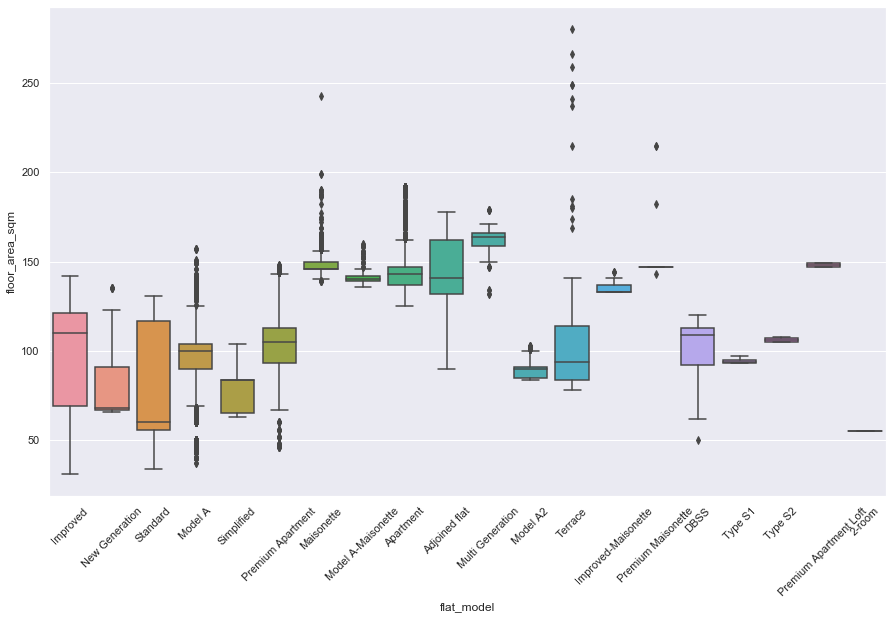

In [25]:
sns.set(rc={'figure.figsize':(15,9)})
chart_town = sns.boxplot(y='floor_area_sqm', x='flat_model', data=df)
x_town=chart_town.get_xticklabels()
chart_town.set_xticklabels(x_town, rotation=45)
#Location / Town appears to affect Resale Price Across Singapore
#Huge variations within: Bishan, Bukit Batok, Bukit Panjang, Bukit Timah, Geylang, Jurong, Queenstown, Toa Payoh
#-- other underlying factors at play here to see how Resale Price affect a Town

## Supplementary data

### Longitude & Latitude Data of Flat

In [26]:
# df.loc[df.year.between(2012, 2019, inclusive=True)].address.drop_duplicates().to_excel('address.xlsx')

In [ ]:
# import json
# import requests
# import openpyxl
# import time

# # Open Excel sheet
# wb = openpyxl.load_workbook('address.xlsx')
# sheet = wb['Sheet1']

# count = 0
# for row in range(2, sheet.max_row + 1):
#     if count < 250:
#         street_name = sheet['A' + str(row)].value
        
#         query_string = 'https://developers.onemap.sg/commonapi/search?searchVal=' + str(
#          street_name) + '&returnGeom=Y&getAddrDetails=N&pageNum=1'
        
#         response = requests.get(query_string)
        
#         if response:
#             data=response.json()
#             if data['found']>0:
#                 sheet['B' + str(row)] = data['results'][0]['LONGITUDE']
#                 sheet['C' + str(row)] = data['results'][0]['LATITUDE']
#             else:
#                 sheet['B' + str(row)] = 0
#                 sheet['C' + str(row)] = 0
#         count = count + 1
    
#     else:
#         print("Pausing for 10 Seconds")
#         time.sleep(10)
#         count = 0
    
#     wb.save('address.xlsx')

# print('Job Done.')

In [4]:
from geopy import distance
def nearest_mrt(flat_location):
    temp_dict={}
    for index, row in mrt_df.iterrows():
        mrt_location_lat = tuple([row['Latitude']],)
        mrt_location_long = tuple([row['Longitude']],)
        mrt_location = mrt_location_lat + mrt_location_long
        temp_dict[row['STN_NAME']] = distance.distance(flat_location, mrt_location).km
    return min(temp_dict.values())
        

In [5]:
from geopy import distance
def distance_to_cbd(flat_location):
    row = mrt_df.loc[mrt_df.STN_NAME.str.contains("RAFFLES PLACE")].head(1)
    raffles = tuple(np.array([float(row.Latitude), float(row.Longitude)]))
    return distance.distance(flat_location, raffles).km

In [6]:
#address_df['km_to_mrt'] = address_df.apply(lambda x: nearest_mrt(tuple(np.array([x.lat,x.long]))), axis=1)

In [7]:
#address_df['km_to_cbd'] = address_df.apply(lambda x: distance_to_cbd(tuple(np.array([x.lat,x.long]))), axis=1)

In [8]:
#address_df.to_csv('address_distance.csv')

In [13]:
# address_df = pd.read_excel('address.xlsx')
address_df = pd.read_csv('address_distance.csv', index_col=0)
address_df.columns = ['address', 'long', 'lat', 'km_to_mrt', 'km_to_cbd']
mrt_df = pd.read_csv('mrtsg.csv')

In [14]:
df=df.merge(address_df, on='address', how='left')

In [37]:

df.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,year,approx_storey,address,long,lat,km_to_mrt,km_to_cbd
0,172,Improved,2 ROOM,45.0,1986,2012-03-01,73,250000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,2012,8.0,172 ANG MO KIO AVE 4,103.836708,1.374777,1.198185,10.157257
1,510,Improved,2 ROOM,44.0,1980,2012-03-01,67,265000.0,01 TO 05,ANG MO KIO AVE 8,ANG MO KIO,2012,3.0,510 ANG MO KIO AVE 8,103.849073,1.373401,0.387154,9.875171
2,610,New Generation,3 ROOM,68.0,1980,2012-03-01,67,315000.0,06 TO 10,ANG MO KIO AVE 4,ANG MO KIO,2012,8.0,610 ANG MO KIO AVE 4,103.839157,1.379395,0.694906,10.622933
3,474,New Generation,3 ROOM,67.0,1984,2012-03-01,71,320000.0,01 TO 05,ANG MO KIO AVE 10,ANG MO KIO,2012,3.0,474 ANG MO KIO AVE 10,103.858015,1.362758,1.231379,8.725328
4,604,New Generation,3 ROOM,67.0,1980,2012-03-01,67,321000.0,06 TO 10,ANG MO KIO AVE 5,ANG MO KIO,2012,8.0,604 ANG MO KIO AVE 5,103.835977,1.379867,1.019572,10.725813


## Data Exploration of GeoData

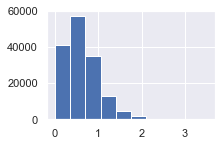

In [38]:
sns.set(rc={'figure.figsize':(3,2)})
df.km_to_mrt.hist()

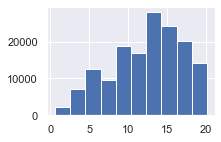

In [39]:
sns.set(rc={'figure.figsize':(3,2)})
df.km_to_cbd.hist()

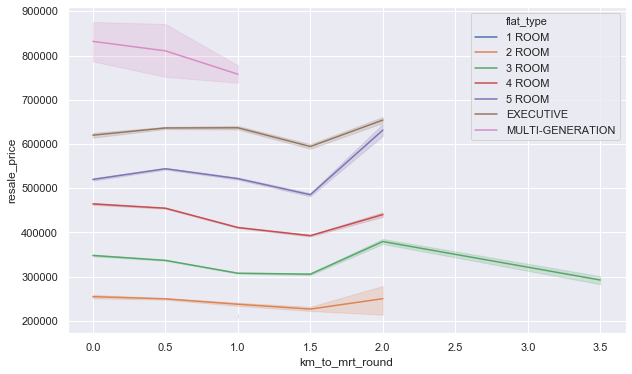

In [40]:
sns.set(rc={'figure.figsize':(10,6)})
df['km_to_mrt_round']=df.apply(lambda x: round(x.km_to_mrt * 2) / 2, axis=1) #to smoothen the curve
sns.lineplot(x="km_to_mrt_round", y="resale_price", hue ='flat_type', data=df)
#distance to mrt doesnt seem to affect in the overall resale price

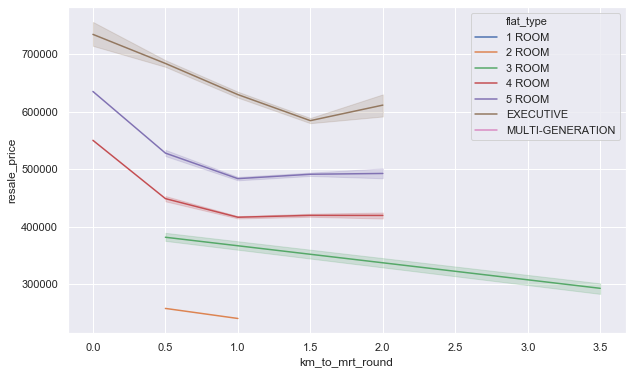

In [41]:
sns.set(rc={'figure.figsize':(10,6)})
df['km_to_mrt_round']=df.apply(lambda x: round(x.km_to_mrt * 2) / 2, axis=1) #to smoothen the curve
sns.lineplot(x="km_to_mrt_round", y="resale_price", hue ='flat_type', data=df.loc[df.town=="PASIR RIS"])
#distance to mrt doesnt seem to affect

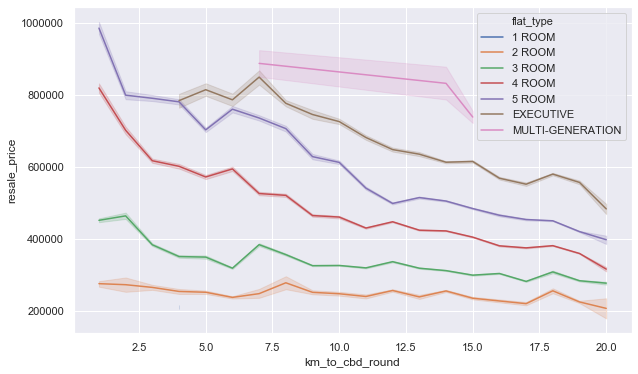

In [42]:
sns.set(rc={'figure.figsize':(10,6)})
df['km_to_cbd_round']=df.apply(lambda x: round(x.km_to_cbd), axis=1) #to smoothen the curve
sns.lineplot(x="km_to_cbd_round", y="resale_price", hue ='flat_type', data=df)
#distance to cbd affects as the house involves is bigger

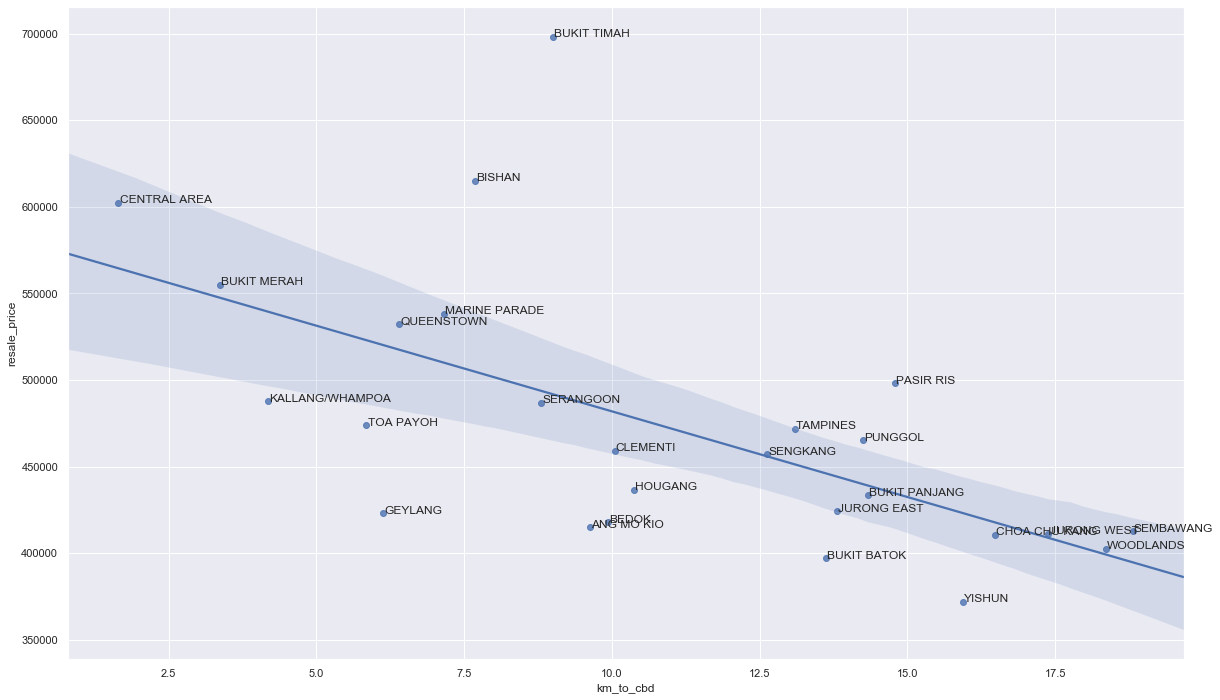

In [43]:
sns.set(rc={'figure.figsize':(20,12)})

a = pd.Series(df.groupby('town').km_to_cbd.mean())
b = pd.Series(df.groupby('town').resale_price.mean())
c = a.index.to_series()

temp_df = pd.concat([a,b, c], axis=1)
ax = sns.regplot(x="km_to_cbd", y="resale_price", data=temp_df)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in temp_df.iterrows():
        ax.text(point['km_to_cbd']+.02, point['resale_price'], str(point['town']))

label_point(df.km_to_cbd, df.resale_price, df.town, plt.gca())  


## Modelling Preparation

### Need to encode Flat Model & Town into the data since they are not numerical

In [15]:
a = df.groupby('town').resale_price.mean() - df.resale_price.mean()
a.rename('town_value', inplace=True)

town
ANG MO KIO         -31223.596489
BEDOK              -28350.057643
BISHAN             168925.986890
BUKIT BATOK        -49128.915591
BUKIT MERAH        108591.283357
BUKIT PANJANG      -12790.998222
BUKIT TIMAH        251911.832650
CENTRAL AREA       156155.764087
CHOA CHU KANG      -35533.546384
CLEMENTI            12832.542892
GEYLANG            -23100.874333
HOUGANG             -9349.005110
JURONG EAST        -21992.547592
JURONG WEST        -34823.262559
KALLANG/WHAMPOA     41564.457288
MARINE PARADE       91888.541964
PASIR RIS           51983.273747
PUNGGOL             19027.780204
QUEENSTOWN          86226.780701
SEMBAWANG          -33491.345067
SENGKANG            10917.787004
SERANGOON           40460.409205
TAMPINES            25494.886622
TOA PAYOH           27737.459121
WOODLANDS          -43631.213683
YISHUN             -74059.316501
Name: town_value, dtype: float64

In [16]:
b= df.groupby('flat_model').resale_price.mean() - df.resale_price.mean()
b.rename('model_value', inplace=True)

flat_model
2-room                   -206059.071605
Adjoined flat             253955.469897
Apartment                 170981.348633
DBSS                      327263.920218
Improved                   12741.108446
Improved-Maisonette       232066.493612
Maisonette                225227.841779
Model A                   -10414.914976
Model A-Maisonette        250203.147532
Model A2                  -75709.964436
Multi Generation          344270.419920
New Generation            -89307.612926
Premium Apartment          26217.643948
Premium Apartment Loft    387822.261728
Premium Maisonette        295633.236087
Simplified                -86615.271321
Standard                  -33906.383888
Terrace                   371413.863974
Type S1                   446211.002905
Type S2                   560768.928395
Name: model_value, dtype: float64

In [17]:
temp_modeldf = df.merge(a, how='left', on='town')

In [18]:
temp_modeldf = temp_modeldf.merge(b, how='left', on='flat_model')

In [19]:
X = temp_modeldf[['floor_area_sqm', 'remaining_lease', 'approx_storey', 'km_to_mrt','km_to_cbd', 'town_value', 'model_value']]
y = temp_modeldf.resale_price

In [20]:
X.describe()

,floor_area_sqm,remaining_lease,approx_storey,km_to_mrt,km_to_cbd,town_value,model_value
count,153934.000000,153934.000000,153934.000000,153934.000000,153934.000000,1.539340e+05,1.539340e+05
mean,97.079070,74.563391,8.187587,0.629036,12.331870,2.662879e-10,-4.964517e-09
std,24.502416,11.380239,5.392958,0.384231,4.492123,5.290042e+04,7.973103e+04
min,31.000000,46.000000,2.000000,0.000434,0.585059,-7.405932e+04,-2.060591e+05
25%,74.000000,66.000000,5.000000,0.336906,9.469648,-3.482326e+04,-3.390638e+04
50%,95.000000,74.000000,8.000000,0.556395,13.142828,-1.279100e+04,-1.041491e+04
75%,112.000000,84.000000,11.000000,0.838619,15.782514,2.549489e+04,1.274111e+04
max,280.000000,98.000000,50.000000,3.515569,20.120842,2.519118e+05,5.607689e+05


In [21]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [53]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()  
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.7773712859978616

In [54]:
from sklearn.tree import DecisionTreeRegressor  
dt = DecisionTreeRegressor(random_state = 0)  
dt.fit(X_train, y_train)
dt.score(X_test, y_test)


0.9017516416905262

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, 
                               bootstrap = True)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


MemoryError: could not allocate 7340032 bytes

In [ ]:
param_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
n_jobs=4

def RFBooster(param_grid, n_jobs):

    estimator = RandomForestRegressor()
    cv = TimeSeriesSplit()
    classifier = RandomizedSearchCV(estimator=estimator, cv=cv, param_grid =param_grid, n_jobs=n_jobs)

    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_)
    
    return cv, classifier.best_estimator_


#Let's fit GBRT to the digits training dataset by calling the function we just created.
cv,best_est=RFBooster(param_grid, n_jobs)

In [57]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

def GradientBooster(param_grid, n_jobs):

    estimator = GradientBoostingRegressor()
    cv = TimeSeriesSplit()
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)

    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_)
    
    return cv, classifier.best_estimator_


In [1]:
param_grid={'n_estimators':[500], #previous: 100,200,300 (300) -- #500
            'learning_rate': [0.105, 0.11, 0.115], #previous: 0.5, 0.7, 1.0 (1.0) -- 0.105 from 0.955, 0.1, 0.105
            'max_depth':[6], #previous: 3, 4, 5, 6 (6) -- #8 from 6, 7, 8
            'min_samples_leaf':[3], #previous: 3, 5, 7 (3) --#3 from 1, 2, 3
            'max_features':[0.85, 0.9, 0.95], #previous: 0.4, 0.8, 1.0 (1.0) -- #0.9 from 0.9, 1.0
           }
n_jobs=4

#Let's fit GBRT to the digits training dataset by calling the function we just created.
cv,best_est=GradientBooster(param_grid, n_jobs)

NameError: name 'GradientBooster' is not defined

In [59]:
clf=GradientBoostingRegressor()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8630596557649088

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
clf=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.105, loss='ls', max_depth=8,
                          max_features=0.85, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9466379384858584

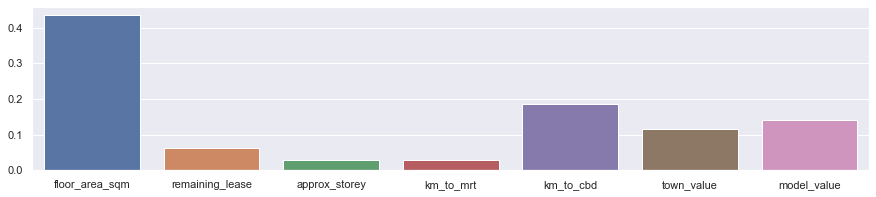

In [61]:
sns.set(rc={'figure.figsize':(15,3)})
feature_names = X_train.columns # e.g. ['A', 'B', 'C', 'D', 'E']
sns.barplot(x=feature_names, y=clf.feature_importances_)
#percentage importancea

In [62]:
X3 = temp_modeldf.loc[temp_modeldf.flat_type=='3 ROOM']
X4 = temp_modeldf.loc[temp_modeldf.flat_type=='4 ROOM']
X5 = temp_modeldf.loc[temp_modeldf.flat_type=='5 ROOM']

In [63]:
y3 = X3.resale_price
X3 = X3[['floor_area_sqm', 'remaining_lease', 'approx_storey', 'km_to_mrt','km_to_cbd', 'town_value', 'model_value']]

y4 = X4.resale_price
X4 = X4[['floor_area_sqm', 'remaining_lease', 'approx_storey', 'km_to_mrt','km_to_cbd', 'town_value', 'model_value']]

y5 = X5.resale_price
X5 = X5[['floor_area_sqm', 'remaining_lease', 'approx_storey', 'km_to_mrt','km_to_cbd', 'town_value', 'model_value']]


In [64]:
X_train_3 = X3[:int(X3.shape[0]*0.7)]
X_test_3 = X3[int(X3.shape[0]*0.7):]
y_train_3 = y3[:int(X3.shape[0]*0.7)]
y_test_3 = y3[int(X3.shape[0]*0.7):]

In [65]:
X_train_4 = X4[:int(X4.shape[0]*0.7)]
X_test_4 = X4[int(X4.shape[0]*0.7):]
y_train_4 = y4[:int(X4.shape[0]*0.7)]
y_test_4 = y4[int(X4.shape[0]*0.7):]

In [66]:
X_train_5 = X5[:int(X5.shape[0]*0.7)]
X_test_5 = X5[int(X5.shape[0]*0.7):]
y_train_5 = y5[:int(X5.shape[0]*0.7)]
y_test_5 = y5[int(X5.shape[0]*0.7):]

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
clf=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.105, loss='ls', max_depth=8,
                          max_features=0.85, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

clf.fit(X_train_3, y_train_3)
clf.score(X_test_3, y_test_3)

0.8343992489715276

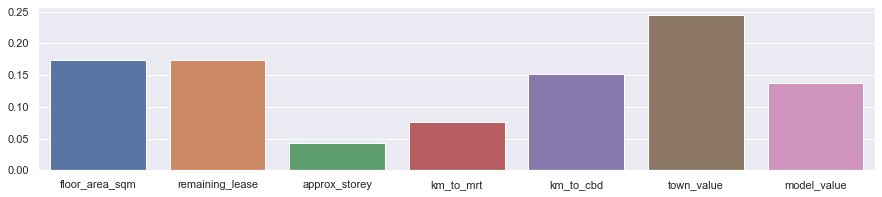

In [68]:
sns.set(rc={'figure.figsize':(15,3)})
feature_names = X_train_3.columns # e.g. ['A', 'B', 'C', 'D', 'E']
sns.barplot(x=feature_names, y=clf.feature_importances_)
#percentage importancea

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
clf=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.105, loss='ls', max_depth=8,
                          max_features=0.85, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

clf.fit(X_train_4, y_train_4)
clf.score(X_test_4, y_test_4)

0.9203629444974089

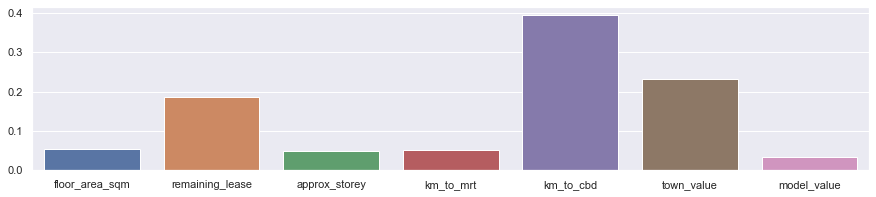

In [70]:
sns.set(rc={'figure.figsize':(15,3)})
feature_names = X_train_4.columns # e.g. ['A', 'B', 'C', 'D', 'E']
sns.barplot(x=feature_names, y=clf.feature_importances_)
#percentage importancea

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
clf=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.105, loss='ls', max_depth=8,
                          max_features=0.85, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

clf.fit(X_train_5, y_train_5)
clf.score(X_test_5, y_test_5)

0.9199995659957305

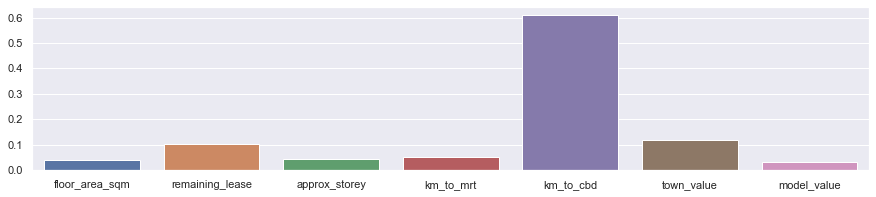

In [72]:
sns.set(rc={'figure.figsize':(15,3)})
feature_names = X_train_5.columns # e.g. ['A', 'B', 'C', 'D', 'E']
sns.barplot(x=feature_names, y=clf.feature_importances_)
#percentage importancea